<a href="https://colab.research.google.com/github/PhonxayMax/Deep_Learning_with_PyToch_Eli_steven_Luca_Thomas/blob/main/Ch4_1_image_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Starting save
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import imageio

img_arr = imageio.imread('/content/drive/MyDrive/2_DL_with_PyTorch_Eli_Steven/bobby.jpg')
img_arr.shape

<ipython-input-7-0775ea7016d5>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('/content/drive/MyDrive/2_DL_with_PyTorch_Eli_Steven/bobby.jpg')


(720, 1280, 3)

In [ ]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape

torch.Size([3, 720, 1280])

In [ ]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [ ]:
import os

data_dir = '/content/drive/MyDrive/image-cats'
"""โหลดภาพทั้งหมดจากโฟลเดอร์ โดยใช้ os.listdir()"""
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    """ใช้ imageio.imread() เพื่อโหลดภาพแต่ละภาพ"""
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    """ตัดเฉพาะ 3 ช่องแรก (img_t[:3]) เพราะบางไฟล์อาจมี Alpha Channel ซึ่งใช้สำหรับความโปร่งใส (Transparency) แต่โครงข่ายประสาทเทียมต้องการเฉพาะ RGB"""
    img_t = img_t[:3] # <1>
    """เพิ่มภาพลงใน batch ตามตำแหน่งที่เหมาะสม"""
    batch[i] = img_t

<ipython-input-26-adcd4b717c43>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [ ]:
"""Line-by-Line Code Explanation
batch_size = 3
➡️ Sets the number of images in a batch to 3
➡️ กำหนดขนาด batch เป็น 3 รูปภาพ
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
➡️ Pre-allocates a 4D tensor of shape (3, 3, 256, 256)
➡️ สร้างเทนเซอร์เปล่าขนาด (N, C, H, W)
import os
📁 To read file names from the directory
📁 ใช้ในการจัดการเส้นทางไฟล์
data_dir = '../data/p1ch4/image-cats/'
📂 Directory that contains the image files
📂 โฟลเดอร์เก็บภาพที่เราจะโหลด
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
📝 Filters only .png files
📝 เลือกเฉพาะไฟล์ภาพ .png
for i, filename in enumerate(filenames):
    ใช้ imageio.imread() เพื่อโหลดภาพแต่ละภาพ
    img_arr = imageio.imread(os.path.join(data_dir, filename))
🧠 Reads each image into a NumPy array
🧠 โหลดภาพแต่ละภาพเป็นอาเรย์
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
🔄 Rearranges from H×W×C → C×H×W
🔄 เปลี่ยนมิติให้เหมาะกับ PyTorch (ช่องสีต้องมาก่อน)
    img_t = img_t[:3]
✂️ Keep only the first 3 channels (drop alpha)
✂️ เก็บเฉพาะช่อง R, G, B
    batch[i] = img_t
📦 Save tensor into batch at index i
📦 บันทึกเทนเซอร์ภาพลงในตำแหน่งที่เหมาะสมใน batch"""

"Line-by-Line Code Explanation\nbatch_size = 3\n➡️ Sets the number of images in a batch to 3\n➡️ กำหนดขนาด batch เป็น 3 รูปภาพ\nbatch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)\n➡️ Pre-allocates a 4D tensor of shape (3, 3, 256, 256)\n➡️ สร้างเทนเซอร์เปล่าขนาด (N, C, H, W)\nimport os\n📁 To read file names from the directory\n📁 ใช้ในการจัดการเส้นทางไฟล์\ndata_dir = '../data/p1ch4/image-cats/'\n📂 Directory that contains the image files\n📂 โฟลเดอร์เก็บภาพที่เราจะโหลด\nfilenames = [name for name in os.listdir(data_dir)\n             if os.path.splitext(name)[-1] == '.png']\n📝 Filters only .png files\n📝 เลือกเฉพาะไฟล์ภาพ .png\nfor i, filename in enumerate(filenames):\n    ใช้ imageio.imread() เพื่อโหลดภาพแต่ละภาพ\n    img_arr = imageio.imread(os.path.join(data_dir, filename))\n🧠 Reads each image into a NumPy array\n🧠 โหลดภาพแต่ละภาพเป็นอาเรย์\n    img_t = torch.from_numpy(img_arr)\n    img_t = img_t.permute(2, 0, 1)\n🔄 Rearranges from H×W×C → C×H×W\n🔄 เปลี่ยนมิติให้เหมาะกับ Py

In [ ]:
os.listdir(data_dir)

['cat3.png', 'cat1.png', 'cat2.png']

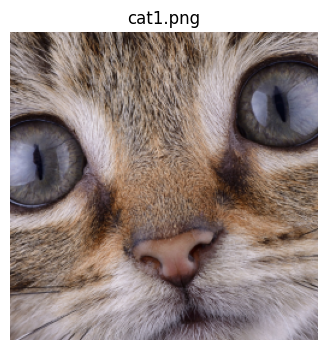

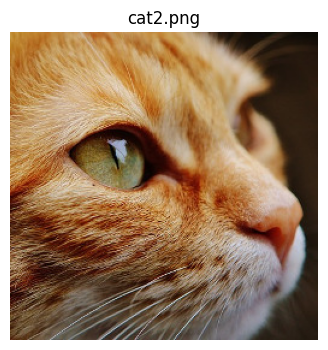

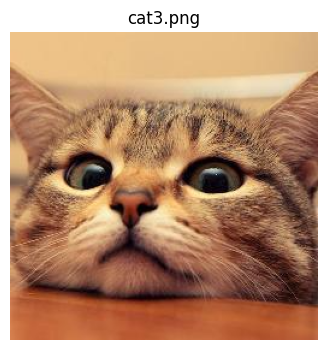

In [ ]:
"""Copy and paste above code cell and, then prompt on ChatGPT
I want to print the cat1.png, cat2.png and cat3.png in image-cats folder"""


import os
import torch
import imageio.v2 as imageio  # safer version of imageio
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/image-cats'

# Step 1: List only .png files
filenames = [name for name in os.listdir(data_dir) if name.endswith('.png')]

# Optional: sort to make sure we get cat1, cat2, cat3 in order
filenames = sorted(filenames)[:3]

# Step 2: Load and display the images
for i, filename in enumerate(filenames):
    path = os.path.join(data_dir, filename)
    img_arr = imageio.imread(path)           # Load image as numpy array
    img_t = torch.from_numpy(img_arr)        # Convert to tensor
    img_t = img_t.permute(2, 0, 1)[:3]        # Rearrange to [C, H, W] and keep RGB

    # Plotting the image (convert it back to [H, W, C] for matplotlib)
    img_to_show = img_t.permute(1, 2, 0).numpy()

    plt.figure(figsize=(4, 4))
    plt.imshow(img_to_show.astype('uint8'))
    plt.title(filename)
    plt.axis('off')
    plt.show()


In [ ]:
batch = batch.float()
batch /= 255.0

In [ ]:
n_channels = batch.shape[1]
print(n_channels)
n = range(n_channels)
print(n)
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

3
range(0, 3)
